# Digit Recognition Models #1
### [Colaboratory Version](https://colab.research.google.com/drive/1eqk81yU_y7t6Rridkgli_C7LwPLUFvH2)

In [1]:
import warnings; warnings.filterwarnings('ignore')
import os,pandas as pd,numpy as np,xgboost as xgb
import pylab as pl,seaborn as sn
from scipy import stats
from sklearn import svm,manifold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.semi_supervised import label_propagation
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,hamming_loss
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier,BernoulliRBM
from keras.utils import to_categorical
pl.style.use('seaborn-whitegrid'); N,N1,N2=5000,7000,6000

Using TensorFlow backend.


In [2]:
def plot_embedding(X,y,title=None):
    x_min,x_max=np.min(X,0),np.max(X,0)
    X=(X-x_min)/(x_max-x_min)
    pl.figure(figsize=(12,10))
    for i in range(X.shape[0]):
        pl.text(X[i,0],X[i,1],str(y[i]),
                 color=pl.cm.Set1(y[i]/10.),
                 fontdict={'weight':'bold','size':10})
    pl.xticks([]),pl.yticks([])
    if title is not None: pl.title(title)
def tts(X,y): 
    x_train,x_test,y_train,y_test=\
    train_test_split(X,y,test_size=.2,random_state=1)
    n=int(len(x_test)/2)
    x_valid,y_valid=x_test[:n],y_test[:n]
    x_test,y_test=x_test[n:],y_test[n:]
    return x_train,x_valid,x_test,y_train,y_valid,y_test
def clf_fit_score(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)    
    y_clf_train=clf.predict(x_train)
    y_clf_test=clf.predict(x_test)        
    acc_clf_train=\
    round(accuracy_score(y_train,y_clf_train),6)
    acc_clf_test=\
    round(accuracy_score(y_test,y_clf_test),6)   
    loss_clf_train=\
    round(hamming_loss(y_train,y_clf_train),6)
    loss_clf_test=\
    round(hamming_loss(y_test,y_clf_test),6)   
    return [str(clf),y_clf_train,y_clf_test,
            acc_clf_train,acc_clf_test,
            loss_clf_train,loss_clf_test]

### Data

In [3]:
train=pd.read_csv("../input/train.csv")
images=["%s%s" %("pixel",pixel_no) for pixel_no in range(0,784)]
train_images=np.array(train[images])
train_images=train_images.astype('float32')/255
train_images.shape

(42000, 784)

In [4]:
train_labels=train['label'].values.astype('int16')
train_labels_cat=to_categorical(train_labels,num_classes=10)
train_labels_cat.shape

(42000, 10)

In [5]:
x_train,x_valid,x_test,\
y_train,y_valid,y_test=tts(train_images,train_labels)

### [sklearn.manifold.TSNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

Computing t-SNE embedding


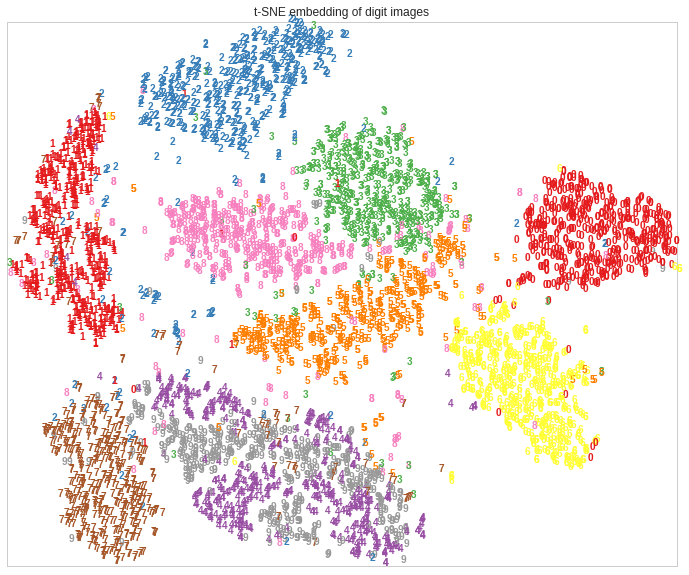

In [6]:
print("Computing t-SNE embedding")
tsne=manifold.TSNE(n_components=2,init='pca',random_state=0)
x_tsne=tsne.fit_transform(train_images[:N])
plot_embedding(x_tsne,train_labels[:N],
               title="t-SNE embedding of digit images")

In [7]:
#!pip install tsnecuda
#from tsnecuda import TSNE
#print("Computing t-SNE embedding")
#x_emb=TSNE(n_components=2).fit_transform(train_images)
#plot_embedding(x_emb,train_labels,
#               title="t-SNE embedding of digit images")

### [sklearn.neural_network.MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html/)

In [8]:
nn_clf=MLPClassifier(hidden_layer_sizes=(512,),max_iter=80,solver='sgd',
                     verbose=1,random_state=1,learning_rate_init=.01)
nn_clf.fit(x_train,y_train)
[nn_clf.score(x_train,y_train),
 nn_clf.score(x_test,y_test)]

Iteration 1, loss = 0.71269256
Iteration 2, loss = 0.33481967
Iteration 3, loss = 0.28372816
Iteration 4, loss = 0.25307023
Iteration 5, loss = 0.22881376
Iteration 6, loss = 0.20914190
Iteration 7, loss = 0.19249132
Iteration 8, loss = 0.17838234
Iteration 9, loss = 0.16539402
Iteration 10, loss = 0.15454295
Iteration 11, loss = 0.14453708
Iteration 12, loss = 0.13610877
Iteration 13, loss = 0.12801344
Iteration 14, loss = 0.12122291
Iteration 15, loss = 0.11458969
Iteration 16, loss = 0.10805995
Iteration 17, loss = 0.10355657
Iteration 18, loss = 0.09839871
Iteration 19, loss = 0.09366262
Iteration 20, loss = 0.08922644
Iteration 21, loss = 0.08524616
Iteration 22, loss = 0.08146286
Iteration 23, loss = 0.07812305
Iteration 24, loss = 0.07488282
Iteration 25, loss = 0.07156953
Iteration 26, loss = 0.06900574
Iteration 27, loss = 0.06610852
Iteration 28, loss = 0.06373314
Iteration 29, loss = 0.06117271
Iteration 30, loss = 0.05903871
Iteration 31, loss = 0.05669281
Iteration 32, los

[0.9991964285714285, 0.9780952380952381]

In [9]:
print("MLPClassifier:\n%s\n"\
%(classification_report(y_test,nn_clf.predict(x_test))))

MLPClassifier:
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       433
          1       0.99      0.99      0.99       452
          2       0.98      0.98      0.98       414
          3       0.98      0.96      0.97       450
          4       0.98      0.99      0.99       403
          5       0.97      0.97      0.97       340
          6       0.98      0.99      0.98       397
          7       0.97      0.98      0.97       447
          8       0.98      0.97      0.97       435
          9       0.97      0.97      0.97       429

avg / total       0.98      0.98      0.98      4200




### [sklearn.neural_network.BernoulliRBM](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.BernoulliRBM.html#sklearn.neural_network.BernoulliRBM)

In [10]:
x_train_scaled=\
(x_train-np.min(x_train,0))/(np.max(x_train,0)+.0001)
x_test_scaled=\
(x_test-np.min(x_test,0))/(np.max(x_test,0)+.0001)
logistic=LogisticRegression(solver='liblinear',multi_class='ovr',
                            max_iter=50,tol=.0001,C=5000.0)
brbm=BernoulliRBM(random_state=0,verbose=False)
brbm.learning_rate,brbm.n_iter,brbm.n_components=.05,50,64
nn_clf2=Pipeline(steps=[('brbm',brbm),('logistic',logistic)])
nn_clf2.fit(x_train_scaled,y_train)

Pipeline(memory=None,
     steps=[('brbm', BernoulliRBM(batch_size=10, learning_rate=0.05, n_components=64, n_iter=50,
       random_state=0, verbose=False)), ('logistic', LogisticRegression(C=5000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=50,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [11]:
print("Logistic regression & BRBM features:\n%s\n"\
%(classification_report(y_test,nn_clf2.predict(x_test_scaled))))

Logistic regression & BRBM features:
             precision    recall  f1-score   support

          0       0.95      0.96      0.96       433
          1       0.96      0.98      0.97       452
          2       0.89      0.93      0.91       414
          3       0.88      0.85      0.86       450
          4       0.91      0.88      0.90       403
          5       0.88      0.84      0.86       340
          6       0.95      0.95      0.95       397
          7       0.94      0.92      0.93       447
          8       0.88      0.91      0.90       435
          9       0.85      0.87      0.86       429

avg / total       0.91      0.91      0.91      4200




### [sklearn ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html) & other classifiers

In [12]:
clf=[svm.SVC(C=10.0,kernel='poly'),
     xgb.XGBClassifier(objective="multi:softprob",random_state=42)]
#     LogisticRegressionCV(solver='liblinear',multi_class='ovr'),
#     KNeighborsClassifier(),
#     RadiusNeighborsClassifier(radius=30),
#     RandomForestClassifier(n_estimators=64,max_depth=11)]

In [13]:
result=[]
for c in clf:
    result.append(clf_fit_score(c,x_train[:N1],x_test[:N1-N2],
                                y_train[:N1],y_test[:N1-N2]))

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [14]:
for i in range(2):
    print(result[i][0])
    print('accuracy train/test: %s'%result[i][3:5])
    print('loss train/test: %s'%result[i][5:7])
    print(50*'=')

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
accuracy train/test: [0.630429, 0.667]
loss train/test: [0.369571, 0.333]
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
accuracy train/test: [0.980286, 0.922]
loss train/test: [0.019714, 0.078]


### [sklearn.semi_supervised.LabelSpreading](http://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html#sklearn.semi_supervised.LabelSpreading)

In [15]:
n_total=N1; n_labeled=N2
X=np.copy(train_images[:n_total])
y=np.copy(train_labels[:n_total])
y[n_labeled:]=-1
lp_model=label_propagation\
.LabelSpreading(kernel='knn',n_neighbors=10,
                n_jobs=-1,max_iter=200)
lp_model.fit(X,y)
pred_labels=lp_model.transduction_[n_labeled:n_total]
true_labels=train_labels[n_labeled:n_total]

In [16]:
print("Label Spreading: %d labeled & %d unlabeled points (%d total)"%\
      (n_labeled,n_total-n_labeled,n_total))
print(classification_report(true_labels,pred_labels))
print("Confusion matrix")
confusionmatrix=confusion_matrix(true_labels,pred_labels,
                                 labels=lp_model.classes_)
print(confusionmatrix)

Label Spreading: 6000 labeled & 1000 unlabeled points (7000 total)
             precision    recall  f1-score   support

          0       0.95      0.97      0.96        97
          1       0.86      0.99      0.92       125
          2       1.00      0.91      0.95        95
          3       0.93      0.94      0.93        99
          4       0.94      0.89      0.92        93
          5       0.96      0.91      0.93        86
          6       0.96      0.99      0.98        83
          7       0.95      0.89      0.92       113
          8       1.00      0.90      0.95        93
          9       0.86      0.94      0.90       116

avg / total       0.94      0.93      0.93      1000

Confusion matrix
[[ 94   1   0   0   0   0   2   0   0   0]
 [  0 124   0   0   0   0   0   0   0   1]
 [  1   3  86   1   1   1   0   1   0   1]
 [  0   3   0  93   0   2   0   1   0   0]
 [  0   1   0   0  83   0   1   0   0   8]
 [  0   1   0   4   1  78   0   1   0   1]
 [  1   0   0   0  

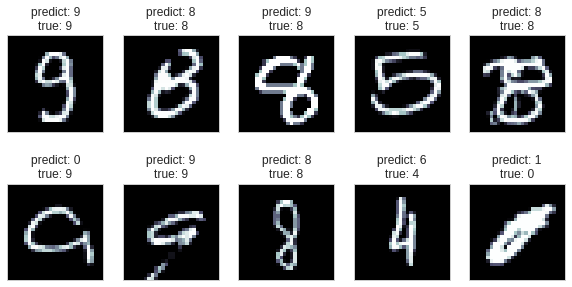

In [17]:
predict_entropies=stats.distributions\
.entropy(lp_model.label_distributions_.T)
uncertainty_index=np.argsort(predict_entropies)[-10:]
ui=pl.figure(figsize=(10,5))
for index,image_index in enumerate(uncertainty_index):
    image=train_images[image_index].reshape(28,28)
    sub=ui.add_subplot(2,5,index+1)
    sub.imshow(image,cmap=pl.cm.bone)
    pl.xticks([]); pl.yticks([])
    sub.set_title('predict: %i\ntrue: %i'%(
        lp_model.transduction_[image_index],
        train_labels[image_index]))